# WeatherPy
----


In [1]:
# Dependencies and Setup
import os
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

627

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
processed_cities = []
temps = []
lats = []
lons = []
wind_speeds = []
humidities = []
clouds = []
logs = []
countries = []
datetimes = []
i = 1
for city in cities:
    weather_by_city_url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&units=imperial&appid={weather_api_key}"
    try:
        response = requests.get(weather_by_city_url, timeout=3)
        response.raise_for_status()
        if response.status_code == 200:
            response_json = response.json()
            if response_json['cod'] == 200:
                log = f"{i}. City ID: {response_json['id']} - City Name: {response_json['name']} is being processed"
                logs.append(log)
                print(log)
                i = i + 1
                processed_cities.append(response_json['name'])
                lats.append(response_json['coord']['lat'])
                lons.append(response_json['coord']['lon'])
                temps.append(response_json['main']['temp_max'])
                humidities.append(response_json['main']['humidity'])
                wind_speeds.append(response_json['wind']['speed'])
                clouds.append(response_json['clouds']['all'])
                countries.append(response_json['sys']['country'])
                datetimes.append(response_json['dt'])
    except requests.exceptions.HTTPError as errh:
        print ("Http Error:",errh)
        logs.append(errh)
    except requests.exceptions.ConnectionError as errc:
        print ("Error Connecting:",errc)
        logs.append(errc)
    except requests.exceptions.Timeout as errt:
        print ("Timeout Error:",errt)
        logs.append(errt)
    except requests.exceptions.RequestException as err:
        print ("OOps: Something Else",err)
        logs.append(err)

#print logs to text file
time_now = datetime.now().strftime("%Y_%m_%d-%I_%M_%S_%p")
filename = 'log' + time_now + '.txt'
log_file = os.path.join(os.getcwd(), f'output_data\\{filename}')
with open (log_file, mode = 'w', encoding="utf-8") as txt_file:
    for each in logs:
        txt_file.write(f'{each}\n')
txt_file.close()

1. City ID: 4035715 - City Name: Avarua is being processed
2. City ID: 2013375 - City Name: Vitim is being processed
3. City ID: 3369174 - City Name: Calvinia is being processed
4. City ID: 1714733 - City Name: Dingle is being processed
5. City ID: 3466704 - City Name: Castro is being processed
6. City ID: 5367788 - City Name: Lompoc is being processed
7. City ID: 2163355 - City Name: Hobart is being processed
8. City ID: 4030556 - City Name: Rikitea is being processed
9. City ID: 2017155 - City Name: Saskylakh is being processed
10. City ID: 6185377 - City Name: Yellowknife is being processed
11. City ID: 3369157 - City Name: Cape Town is being processed
12. City ID: 6201424 - City Name: Mataura is being processed
13. City ID: 3418910 - City Name: Upernavik is being processed
14. City ID: 2036075 - City Name: Lingyuan is being processed
15. City ID: 3438102 - City Name: Fuerte Olimpo is being processed
16. City ID: 2075265 - City Name: Busselton is being processed
17. City ID: 2274895

110. City ID: 1688696 - City Name: San Policarpo is being processed
111. City ID: 935215 - City Name: Saint-Philippe is being processed
112. City ID: 1819729 - City Name: Hong Kong is being processed
113. City ID: 3839307 - City Name: Rawson is being processed
114. City ID: 2158767 - City Name: Mareeba is being processed
115. City ID: 3420846 - City Name: Qaqortoq is being processed
116. City ID: 1489401 - City Name: Toora-Khem is being processed
117. City ID: 3466165 - City Name: Cidreira is being processed
118. City ID: 352733 - City Name: Marsá Maţrūḩ is being processed
119. City ID: 2738381 - City Name: Lata is being processed
120. City ID: 6165406 - City Name: Thompson is being processed
121. City ID: 3387204 - City Name: Soure is being processed
122. City ID: 5866583 - City Name: Saint Paul Harbor is being processed
123. City ID: 2194098 - City Name: Ahipara is being processed
124. City ID: 2018735 - City Name: Nyurba is being processed
125. City ID: 2126123 - City Name: Chokurda

212. City ID: 3448903 - City Name: São João da Barra is being processed
213. City ID: 2191562 - City Name: Dunedin is being processed
214. City ID: 3687238 - City Name: Cartagena is being processed
215. City ID: 533964 - City Name: Loukhi is being processed
216. City ID: 6050194 - City Name: La Sarre is being processed
217. City ID: 5859699 - City Name: College is being processed
Http Error: 404 Client Error: Not Found for url: https://api.openweathermap.org/data/2.5/weather?q=tsihombe&units=imperial&appid=80c8f88ff83a74b3016978e9a6fcb63f
218. City ID: 2134814 - City Name: Sola is being processed
219. City ID: 3354071 - City Name: Oranjemund is being processed
220. City ID: 1521230 - City Name: Makīnsk is being processed
221. City ID: 3981432 - City Name: Todos Santos is being processed
222. City ID: 4006806 - City Name: Empalme is being processed
223. City ID: 4946620 - City Name: Palmer is being processed
224. City ID: 1071296 - City Name: Antalaha is being processed
225. City ID: 20

318. City ID: 2537881 - City Name: Safi is being processed
319. City ID: 5882953 - City Name: Aklavik is being processed
320. City ID: 4597919 - City Name: Summerville is being processed
321. City ID: 2017632 - City Name: Priiskovyy is being processed
322. City ID: 471501 - City Name: Vostochnyy is being processed
323. City ID: 2189343 - City Name: Kaeo is being processed
Http Error: 404 Client Error: Not Found for url: https://api.openweathermap.org/data/2.5/weather?q=vaitupu&units=imperial&appid=80c8f88ff83a74b3016978e9a6fcb63f
324. City ID: 6538896 - City Name: Vasto is being processed
325. City ID: 1259395 - City Name: Porbandar is being processed
326. City ID: 5132029 - City Name: Port Washington is being processed
327. City ID: 1502422 - City Name: Kosh-Agach is being processed
328. City ID: 2122614 - City Name: Okha is being processed
329. City ID: 1861416 - City Name: Ishigaki is being processed
330. City ID: 2643557 - City Name: Loughton is being processed
331. City ID: 399446

422. City ID: 3715111 - City Name: Agua Buena is being processed
423. City ID: 5952330 - City Name: Ferme-Neuve is being processed
424. City ID: 5301388 - City Name: Lake Havasu City is being processed
425. City ID: 1502073 - City Name: Krasnosel'kup is being processed
426. City ID: 3984997 - City Name: San Quintín is being processed
427. City ID: 2112802 - City Name: Hasaki is being processed
428. City ID: 3939761 - City Name: Hualmay is being processed
429. City ID: 3842881 - City Name: Nueve de Julio is being processed
430. City ID: 2192362 - City Name: Christchurch is being processed
431. City ID: 4726521 - City Name: San Patricio is being processed
Http Error: 404 Client Error: Not Found for url: https://api.openweathermap.org/data/2.5/weather?q=karauzyak&units=imperial&appid=80c8f88ff83a74b3016978e9a6fcb63f
432. City ID: 1505187 - City Name: Kaa-Khem is being processed
433. City ID: 3440777 - City Name: Rocha is being processed
434. City ID: 1637001 - City Name: Luwuk is being pr

531. City ID: 3628423 - City Name: San Felipe is being processed
532. City ID: 3899539 - City Name: Antofagasta is being processed
533. City ID: 3438735 - City Name: Encarnación is being processed
534. City ID: 3671437 - City Name: Caucayá is being processed
535. City ID: 1337617 - City Name: Muli is being processed
536. City ID: 1731248 - City Name: Alugan is being processed
537. City ID: 780687 - City Name: Berlevåg is being processed
Http Error: 404 Client Error: Not Found for url: https://api.openweathermap.org/data/2.5/weather?q=khonuu&units=imperial&appid=80c8f88ff83a74b3016978e9a6fcb63f
Http Error: 404 Client Error: Not Found for url: https://api.openweathermap.org/data/2.5/weather?q=azrow&units=imperial&appid=80c8f88ff83a74b3016978e9a6fcb63f
538. City ID: 3870243 - City Name: Taltal is being processed
Http Error: 404 Client Error: Not Found for url: https://api.openweathermap.org/data/2.5/weather?q=cam%20pha&units=imperial&appid=80c8f88ff83a74b3016978e9a6fcb63f
539. City ID: 11

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_df = pd.DataFrame({'City': processed_cities,
                          'Lat': lats,
                          'Lon': lons,
                          'Temp': temps,
                          'Humidity': humidities,
                          "Wind Speed": wind_speeds,
                          'Cloud': clouds,
                          'Country': countries,
                          'Date Time': datetimes })
weather_df

,City,Lat,Lon,Temp,Humidity,Wind Speed,Cloud,Country,Date Time
0,Avarua,-21.2078,-159.7750,75.25,53,3.44,75,CK,1634928516
1,Vitim,59.4511,112.5578,34.50,84,8.79,75,RU,1634928518
2,Calvinia,-31.4707,19.7760,50.07,76,15.88,4,ZA,1634928518
3,Dingle,10.9995,122.6711,75.40,93,5.82,100,PH,1634928519
4,Castro,-24.7911,-50.0119,73.27,44,2.82,2,BR,1634928519
...,...,...,...,...,...,...,...,...,...
570,Jiuquan,39.7432,98.5174,42.21,36,4.07,4,CN,1634928797
571,Grindavik,63.8424,-22.4338,45.07,93,25.32,90,IS,1634928798
572,Amahai,-3.3333,128.9167,77.52,85,3.13,98,ID,1634928798
573,Beidao,34.5686,105.8933,50.07,82,4.50,100,CN,1634928621


In [5]:
filename = 'city_weather.csv'
city_weather_file = os.path.join(os.getcwd(), f'output_data\\{filename}')
weather_df.to_csv(city_weather_file, encoding='utf-8')

## Inspect the data and remove the cities where the humidity > 100%.


In [6]:
#drop cities with humidity >100%
weather_df = weather_df.loc[(weather_df['Humidity']<=100)]
weather_df

,City,Lat,Lon,Temp,Humidity,Wind Speed,Cloud,Country,Date Time
0,Avarua,-21.2078,-159.7750,75.25,53,3.44,75,CK,1634928516
1,Vitim,59.4511,112.5578,34.50,84,8.79,75,RU,1634928518
2,Calvinia,-31.4707,19.7760,50.07,76,15.88,4,ZA,1634928518
3,Dingle,10.9995,122.6711,75.40,93,5.82,100,PH,1634928519
4,Castro,-24.7911,-50.0119,73.27,44,2.82,2,BR,1634928519
...,...,...,...,...,...,...,...,...,...
570,Jiuquan,39.7432,98.5174,42.21,36,4.07,4,CN,1634928797
571,Grindavik,63.8424,-22.4338,45.07,93,25.32,90,IS,1634928798
572,Amahai,-3.3333,128.9167,77.52,85,3.13,98,ID,1634928798
573,Beidao,34.5686,105.8933,50.07,82,4.50,100,CN,1634928621


## Plotting the Data


## Latitude vs. Temperature Plot

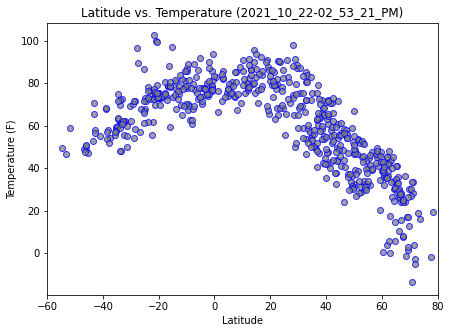

In [7]:
plt.figure(figsize=(7,5))
plt.scatter(weather_df['Lat'], weather_df['Temp'], marker = 'o', facecolors='gray', edgecolors='blue',alpha=0.75)
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title(f'Latitude vs. Temperature ({time_now})')
plt.xlim(-60,80)
filename = 'lat_vs_temp' + time_now + '.png'
graph_file = os.path.join(os.getcwd(), f'output_data\\{filename}')
plt.savefig(graph_file)


# Analyze:
Latitude and Temperature has curved quadratic strong relationship

## Latitude vs. Humidity Plot

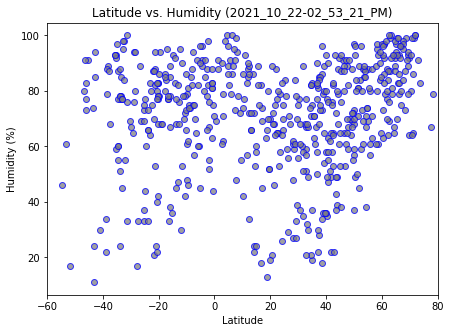

In [8]:
plt.figure(figsize=(7,5))
plt.scatter(weather_df['Lat'], weather_df['Humidity'], marker = 'o', facecolors='gray', edgecolors='blue',alpha=0.75)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'Latitude vs. Humidity ({time_now})')
plt.xlim(-60,80)
filename = 'lat_vs_humidity' + time_now + '.png'
graph_file = os.path.join(os.getcwd(), f'output_data\\{filename}')
plt.savefig(graph_file)


# Analyze:
Latitude and Humidity has no relationship

## Latitude vs. Cloudiness Plot

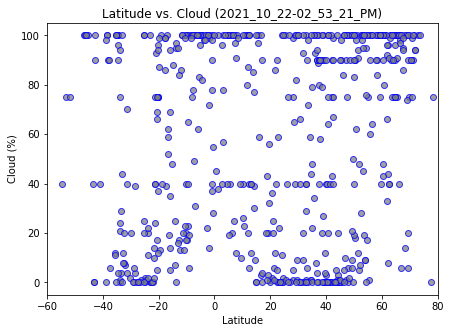

In [9]:
plt.figure(figsize=(7,5))
plt.scatter(weather_df['Lat'], weather_df['Cloud'], marker = 'o', facecolors='gray', edgecolors='blue',alpha=0.75)
plt.xlabel('Latitude')
plt.ylabel('Cloud (%)')
plt.title(f'Latitude vs. Cloud ({time_now})')
plt.xlim(-60,80)
filename = 'lat_vs_cloud' + time_now + '.png'
graph_file = os.path.join(os.getcwd(), f'output_data\\{filename}')
plt.savefig(graph_file)

# Analyze:
Latitude and Cloud has no relationship

## Latitude vs. Wind Speed Plot

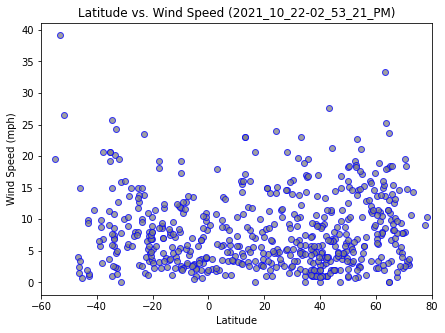

In [10]:
plt.figure(figsize=(7,5))
plt.scatter(weather_df['Lat'], weather_df['Wind Speed'], marker = 'o', facecolors='gray', edgecolors='blue',alpha=0.75)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'Latitude vs. Wind Speed ({time_now})')
plt.xlim(-60,80)
filename = 'lat_vs_windspeed' + time_now + '.png'
graph_file = os.path.join(os.getcwd(), f'output_data\\{filename}')
plt.savefig(graph_file)

# Analyze:
Latitude and Wind Speed has no relationship

## Linear Regression

In [11]:
Northern_Hemisphere = weather_df.loc[(weather_df['Lat']>=0)]
Northern_Hemisphere

,City,Lat,Lon,Temp,Humidity,Wind Speed,Cloud,Country,Date Time
1,Vitim,59.4511,112.5578,34.50,84,8.79,75,RU,1634928518
3,Dingle,10.9995,122.6711,75.40,93,5.82,100,PH,1634928519
5,Lompoc,34.6391,-120.4579,72.01,71,0.00,1,US,1634928520
8,Saskylakh,71.9167,114.0833,-2.65,100,2.84,94,RU,1634928521
9,Yellowknife,62.4560,-114.3525,42.42,69,14.97,40,CA,1634928312
...,...,...,...,...,...,...,...,...,...
568,Aksarka,66.5606,67.7975,27.70,96,8.28,97,RU,1634928796
570,Jiuquan,39.7432,98.5174,42.21,36,4.07,4,CN,1634928797
571,Grindavik,63.8424,-22.4338,45.07,93,25.32,90,IS,1634928798
573,Beidao,34.5686,105.8933,50.07,82,4.50,100,CN,1634928621


In [12]:
Southern_Hemisphere = weather_df.loc[(weather_df['Lat']<0)]
Southern_Hemisphere

,City,Lat,Lon,Temp,Humidity,Wind Speed,Cloud,Country,Date Time
0,Avarua,-21.2078,-159.7750,75.25,53,3.44,75,CK,1634928516
2,Calvinia,-31.4707,19.7760,50.07,76,15.88,4,ZA,1634928518
4,Castro,-24.7911,-50.0119,73.27,44,2.82,2,BR,1634928519
6,Hobart,-42.8794,147.3294,58.12,94,1.01,90,AU,1634928309
7,Rikitea,-23.1203,-134.9692,74.10,83,23.53,100,PF,1634928425
...,...,...,...,...,...,...,...,...,...
558,Kununurra,-15.7667,128.7333,80.58,89,3.44,5,AU,1634928631
561,Maceió,-9.6658,-35.7353,89.04,62,17.27,40,BR,1634928794
564,Ambilobe,-13.2000,49.0500,76.35,82,1.14,95,MG,1634928795
569,Batemans Bay,-35.7167,150.1833,57.09,93,3.67,11,AU,1634928797


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

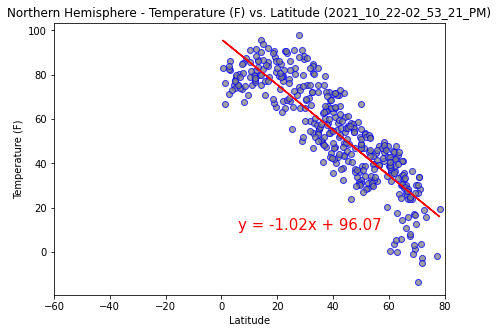

In [13]:
x_values = Northern_Hemisphere['Lat']
y_values = Northern_Hemisphere['Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(7,5))
plt.scatter(x_values, y_values, marker = 'o', facecolors='gray', edgecolors='blue',alpha=0.75)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title(f'Northern Hemisphere - Temperature (F) vs. Latitude ({time_now})')
plt.xlim(-60,80)
filename = 'north_hemis_lat_vs_temp' + time_now + '.png'
graph_file = os.path.join(os.getcwd(), f'output_data\\{filename}')
plt.savefig(graph_file)


# Analyze:
Nothern Hamisphere Latitude and Temp has strong relationship

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

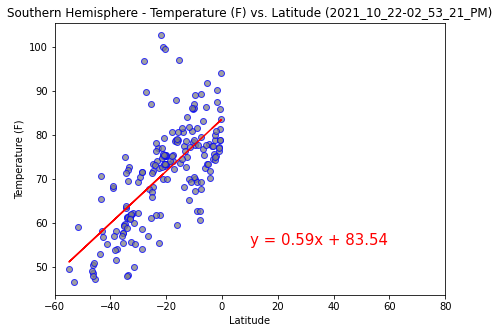

In [26]:
x_values = Southern_Hemisphere['Lat']
y_values = Southern_Hemisphere['Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(7,5))
plt.scatter(x_values, y_values, marker = 'o', facecolors='gray', edgecolors='blue',alpha=0.75)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,55),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title(f'Southern Hemisphere - Temperature (F) vs. Latitude ({time_now})')
plt.xlim(-60,80)
filename = 'south_hemis_lat_vs_temp' + time_now + '.png'
graph_file = os.path.join(os.getcwd(), f'output_data\\{filename}')
plt.savefig(graph_file)


# Analyze:
Shouthern Hamisphere Latitude and Temp has moderate strong relationship

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

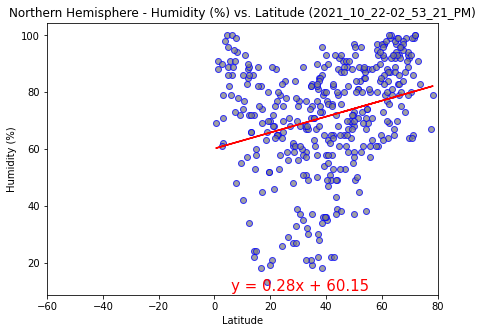

In [15]:
x_values = Northern_Hemisphere['Lat']
y_values = Northern_Hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(7,5))
plt.scatter(x_values, y_values, marker = 'o', facecolors='gray', edgecolors='blue',alpha=0.75)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'Northern Hemisphere - Humidity (%) vs. Latitude ({time_now})')
plt.xlim(-60,80)
filename = 'north_hemis_lat_vs_humidity' + time_now + '.png'
graph_file = os.path.join(os.getcwd(), f'output_data\\{filename}')
plt.savefig(graph_file)


# Analyze:
Nothern Hemisphere Humidity and Latitude has weak relationship, not group related pattern

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

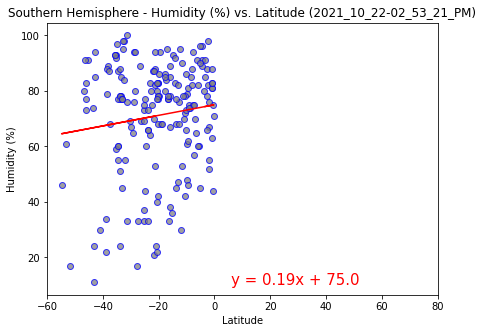

In [16]:
x_values = Southern_Hemisphere['Lat']
y_values = Southern_Hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(7,5))
plt.scatter(x_values, y_values, marker = 'o', facecolors='gray', edgecolors='blue',alpha=0.75)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'Southern Hemisphere - Humidity (%) vs. Latitude ({time_now})')
plt.xlim(-60,80)
filename = 'south_hemis_lat_vs_humidity' + time_now + '.png'
graph_file = os.path.join(os.getcwd(), f'output_data\\{filename}')
plt.savefig(graph_file)

# Analyze:
Shoutherm Hemisphere Humidity and Latitude has weak relationship, not group related pattern

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

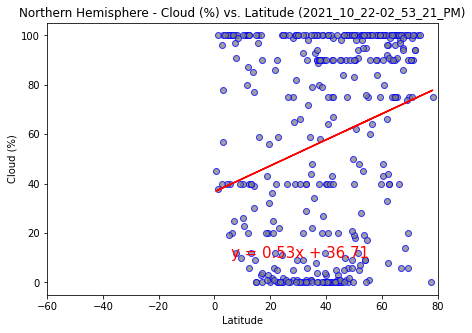

In [17]:
x_values = Northern_Hemisphere['Lat']
y_values = Northern_Hemisphere['Cloud']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(7,5))
plt.scatter(x_values, y_values, marker = 'o', facecolors='gray', edgecolors='blue',alpha=0.75)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloud (%)')
plt.title(f'Northern Hemisphere - Cloud (%) vs. Latitude ({time_now})')
plt.xlim(-60,80)
filename = 'north_hemis_lat_vs_cloud' + time_now + '.png'
graph_file = os.path.join(os.getcwd(), f'output_data\\{filename}')
plt.savefig(graph_file)

# Analyze:
Nothern Hemisphere Cloud and Latitude has weak relationship,  groups with different locations

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

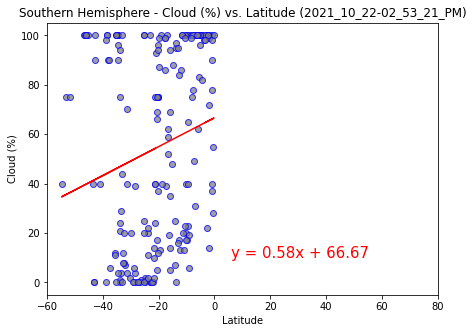

In [18]:
x_values = Southern_Hemisphere['Lat']
y_values = Southern_Hemisphere['Cloud']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(7,5))
plt.scatter(x_values, y_values, marker = 'o', facecolors='gray', edgecolors='blue',alpha=0.75)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloud (%)')
plt.title(f'Southern Hemisphere - Cloud (%) vs. Latitude ({time_now})')
plt.xlim(-60,80)
filename = 'south_hemis_lat_vs_cloud' + time_now + '.png'
graph_file = os.path.join(os.getcwd(), f'output_data\\{filename}')
plt.savefig(graph_file)

# Analyze:
Shoutherm Hemisphere Cloud and Latitude has weak relationship, not group related pattern

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

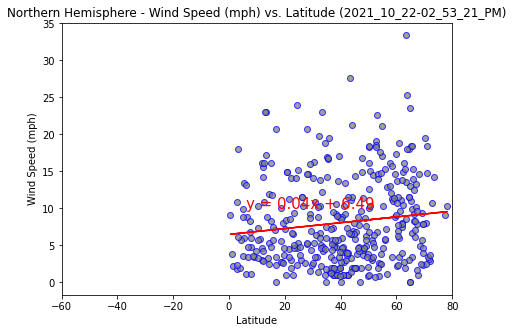

In [19]:
x_values = Northern_Hemisphere['Lat']
y_values = Northern_Hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(7,5))
plt.scatter(x_values, y_values, marker = 'o', facecolors='gray', edgecolors='blue',alpha=0.75)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'Northern Hemisphere - Wind Speed (mph) vs. Latitude ({time_now})')
plt.xlim(-60,80)
filename = 'north_hemis_lat_vs_windspeed' + time_now + '.png'
graph_file = os.path.join(os.getcwd(), f'output_data\\{filename}')
plt.savefig(graph_file)

# Analyze:
Nothern Hemisphere Wind Speed and Latitude has outlier patterns and weak relationship

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

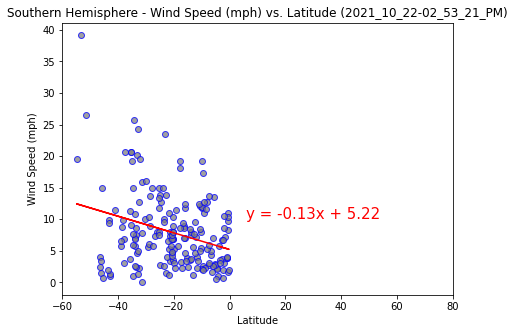

In [20]:
x_values = Southern_Hemisphere['Lat']
y_values = Southern_Hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(7,5))
plt.scatter(x_values, y_values, marker = 'o', facecolors='gray', edgecolors='blue',alpha=0.75)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'Southern Hemisphere - Wind Speed (mph) vs. Latitude ({time_now})')
plt.xlim(-60,80)
filename = 'south_hemis_lat_vs_windspeed' + time_now + '.png'
graph_file = os.path.join(os.getcwd(), f'output_data\\{filename}')
plt.savefig(graph_file)

# Analyze:
Shouthern Hemisphere Wind Speed and Latitude has outlier patterns and weak relationship